In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [2]:
dummies=pd.get_dummies(df.label)

In [3]:
dummies

,FAKE,REAL
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
6330,0,1
6331,1,0
6332,1,0
6333,0,1


In [4]:
df2=pd.concat([df,dummies],axis=1)
df2

,Unnamed: 0,title,text,label,FAKE,REAL
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0,1
...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,0,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,1,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,1,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0,1


In [5]:
df3=df2.drop(['Unnamed: 0','label','REAL'],axis=1)

In [6]:
df3

,title,text,FAKE
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,1
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0


In [7]:
X=df3['text']

In [8]:
y=df3.FAKE

In [9]:
X.shape

(6335,)

In [10]:
y.shape

(6335,)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=7)

In [12]:
X_train.shape

(4434,)

In [13]:
X_test.shape

(1901,)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [18]:
x_train=vectorizer.fit_transform(X_train.values)

In [19]:
x_train.shape

(4434, 58101)

In [20]:
x_test=vectorizer.transform(X_test)

In [21]:
x_test.shape

(1901, 58101)

In [22]:
y_train.shape

(4434,)

In [23]:
y_test.shape

(1901,)

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [25]:
model.fit(x_train,y_train)

C:\Users\Shona\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [26]:
model.score(x_test,y_test)

0.9174118884797475

In [27]:
y_predicted=model.predict(x_test)

In [28]:
y_predicted

array([0, 1, 0, ..., 1, 1, 0], dtype=uint8)

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predicted)

Text(69.0, 0.5, 'Truth')

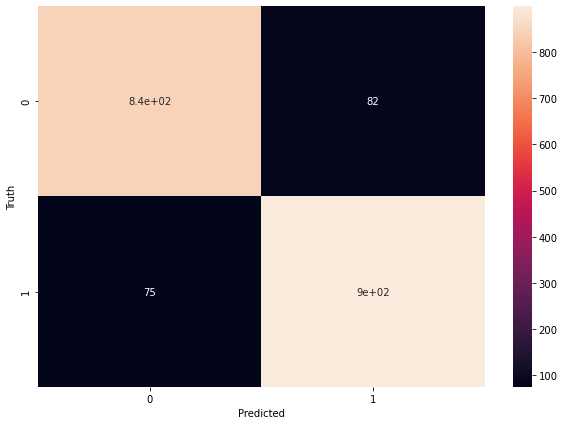

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))#For making figure container 
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')